In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
from torchvision import datasets,transforms
import os

from lxml import etree #网页解析模块
from matplotlib.patches import Rectangle  #绘制正方形
import glob
from PIL import Image #读取图像
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\22789\Anaconda3\envs\pytorch_py\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE= 8

In [3]:
pil_img = Image.open(r'C:\Users\22789\Desktop\学校课程学习\路飞python\Oxford-IIIT Pets Dataset\dataset\images\Abyssinian_1.jpg')

In [4]:
np_img = np.array(pil_img)
np_img.shape #h,w,c

(400, 600, 3)

In [5]:
xml = open(r'C:\Users\22789\Desktop\学校课程学习\路飞python\Oxford-IIIT Pets Dataset\dataset\annotations\xmls\Abyssinian_1.xml').read()

In [6]:
xml

'<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>\n'

In [7]:
sel = etree.HTML(xml)

In [8]:
width = sel.xpath('//size/width/text()')[0]
width

'600'

In [9]:
height = sel.xpath('//size/height/text()')[0]
height

'400'

In [10]:
xmin = sel.xpath('//bndbox/xmin/text()')[0]
xmin

'333'

In [11]:
xmax = sel.xpath('//bndbox/xmax/text()')[0]
ymin = sel.xpath('//bndbox/ymin/text()')[0]
ymax = sel.xpath('//bndbox/ymax/text()')[0]
print(xmin,ymin,xmax,ymax)

333 72 425 158


In [12]:
xmin = int(xmin)
xmax = int(xmax)
ymin = int(ymin)
ymax = int(ymax)

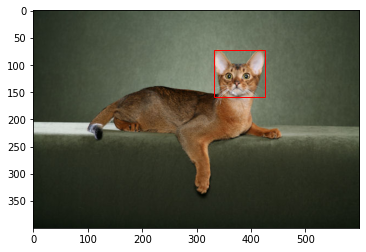

In [13]:
plt.imshow(np_img)
rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')#绘制点，长度和宽度
ax = plt.gca()
ax.axes.add_patch(rect)

In [14]:
img = pil_img.resize((224,224))

In [15]:
xmin = (xmin/int(width))*224 # 比例值 x 现在的尺寸大小
ymin = (ymin/int(height))*224 
xmax = (xmax/int(width))*224
ymax = (ymax/int(height))*224

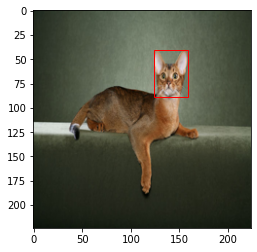

In [16]:
plt.imshow(img)
rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')#绘制点，长度和宽度
ax = plt.gca()
ax.axes.add_patch(rect)

# 数据集的创建

In [17]:
images = glob.glob(r'C:\Users\22789\Desktop\学校课程学习\路飞python\Oxford-IIIT Pets Dataset\dataset\images\*.jpg')

In [18]:
images[:5]

['C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\Abyssinian_1.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\Abyssinian_10.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\Abyssinian_100.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\Abyssinian_101.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\Abyssinian_102.jpg']

In [19]:
len(images)

7390

In [20]:
anno = glob.glob(r'C:\Users\22789\Desktop\学校课程学习\路飞python\Oxford-IIIT Pets Dataset\dataset\annotations\xmls\*.xml')

In [21]:
len(anno)  

3686

In [22]:
xml_name = [x.split('\\')[-1].replace('.xml','') for x in anno]
xml_name[:5]

['Abyssinian_1',
 'Abyssinian_10',
 'Abyssinian_100',
 'Abyssinian_101',
 'Abyssinian_102']

In [23]:
images = [x for x in images if x.split('\\')[-1].replace('.jpg','') in xml_name]
len(images) #筛除掉没有xml标签的样本

3686

In [24]:
images[-5:]

['C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\yorkshire_terrier_186.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\yorkshire_terrier_187.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\yorkshire_terrier_188.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\yorkshire_terrier_189.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\Oxford-IIIT Pets Dataset\\dataset\\images\\yorkshire_terrier_190.jpg']

In [25]:
def to_labels(path):
    xml = open(r'{}'.format(path)).read()
    sel = etree.HTML(xml)
    width = int(sel.xpath('//size/width/text()')[0])
    height = int(sel.xpath('//size/height/text()')[0])
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [(xmin/width),(ymin/height),(xmax/width),(ymax/height)]

In [26]:
labels = [to_labels(p) for p in anno]

In [27]:
len(labels)

3686

In [28]:
index = np.random.permutation(len(images))

In [29]:
images = np.array(images)[index]
labels = np.array(labels)[index]

In [30]:
labels.shape
images.shape

(3686,)

In [31]:
labels = labels.astype(np.float32)

In [32]:
i = int(len(images)*0.8)

In [33]:
train_imgs = images[:i]
train_labels = labels[:i]
test_imgs = images[i:]
test_labels = labels[i:]

In [34]:
transform = torchvision.transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),# 1.c.h,w 2.转换成Tensor 3.归一化
])

In [35]:
class OXford_dataset(data.Dataset):
    def __init__(self,imgs_path,labels_path,transform):
        self.imgs = imgs_path
        self.labels = labels_path
        self.transform = transform
    def __getitem__(self,index):
        img = self.imgs[index]
        l1,l2,l3,l4 = self.labels[index]
        pil_img = Image.open(img)
        imgs_data = np.asarray(pil_img,dtype=np.uint8)
        if len(imgs_data.shape) == 2:
            imgs_data = np.repeat(imgs_data[:, :, np.newaxis], 3, axis=2)
            img_tensor = self.transform(Image.fromarray(imgs_data))
        else:
            img_tensor = self.transform(pil_img)
        return img_tensor,l1,l2,l3,l4 #返回四个目标值
    def __len__(self):
        return len(self.labels)

In [36]:
train_dataset = OXford_dataset(train_imgs,train_labels,transform)
test_dataset = OXford_dataset(test_imgs,test_labels,transform)

In [37]:
BATCH_SIZE = 16

In [38]:
train_dl = data.DataLoader(train_dataset,batch_size = BATCH_SIZE,shuffle =True)

In [39]:
test_dl = data.DataLoader(test_dataset,batch_size = BATCH_SIZE)

In [40]:
img_batch,l1,l2,l3,l4 = next(iter(train_dl))

In [41]:
img_batch.shape

torch.Size([16, 3, 224, 224])

In [42]:
l1.shape

torch.Size([16])

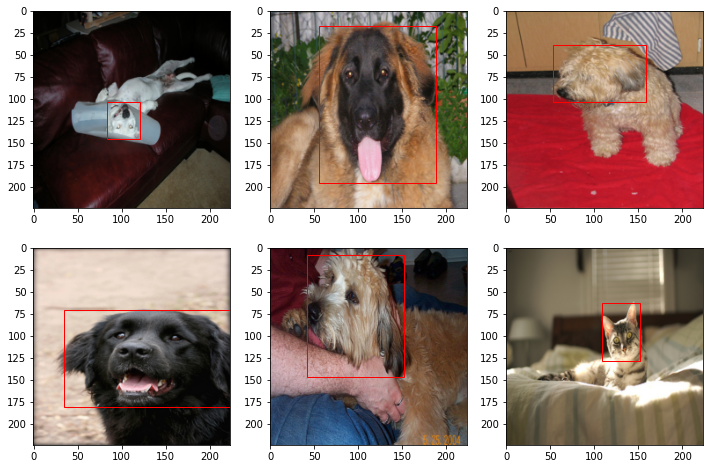

In [43]:
plt.figure(figsize=(12,8))
for i,(img,l1,l2,l3,l4) in enumerate(zip(img_batch[:6],l1[:6],l2[:6],l3[:6],l4[:6])):
    plt.subplot(2,3,i+1)
    img = img.permute(1,2,0).numpy()
    plt.imshow(img)
    xmin,ymin,xmax,ymax = l1*224,l2*224,l3*224,l4*224
    rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')#绘制点，长度和宽度
    ax = plt.gca()
    ax.axes.add_patch(rect)

# 创建定位模型

In [44]:
model = torchvision.models.resnet101(pretrained=True)
list(model.children())[:-1]
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [45]:
conv_base = nn.Sequential(*list(model.children())[:-1])
conv_base

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [46]:
in_size = model.fc.in_features
in_size

2048

In [47]:
 class Net(nn.Module):
        def __init__(self):
            super(Net,self).__init__()
            self.conv_base = nn.Sequential(*list(model.children())[:-1])
            self.fc1 = nn.Linear(in_size,1)
            self.fc2 = nn.Linear(in_size,1)
            self.fc3 = nn.Linear(in_size,1)
            self.fc4 = nn.Linear(in_size,1)
        def forward(self,x):
            x = self.conv_base(x)
            x = x.view(x.size(0),-1)
            x1 = self.fc1(x)
            x2 = self.fc2(x)
            x3 = self.fc3(x)
            x4 = self.fc4(x)
            return x1,x2,x3,x4 #输出预测框的四个位置

In [48]:
model = Net()
model

Net(
  (conv_base): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 25

In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to('cuda')

Net(
  (conv_base): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 25

In [50]:
loss_fn = nn.MSELoss() #回归问题的平均均方误差
from torch.optim import lr_scheduler
opt = torch.optim.Adam(model.parameters(),lr=0.0001)
exp_lr_scheduler = lr_scheduler.StepLR(opt,step_size = 5,gamma=0.1)

In [51]:
def fit(epoch, model, trainloader, testloader):
    total = 0
    running_loss = 0
    
    model.train()
    for x, y1, y2, y3, y4 in trainloader:
        if torch.cuda.is_available():
            x, y1, y2, y3, y4 = (x.to('cuda'), 
                                 y1.to('cuda'), y2.to('cuda'),
                                 y3.to('cuda'), y4.to('cuda'))       
        y_pred1, y_pred2, y_pred3, y_pred4 = model(x)
        loss1 = loss_fn(y_pred1, y1)
        loss2 = loss_fn(y_pred2, y2)
        loss3 = loss_fn(y_pred3, y3)
        loss4 = loss_fn(y_pred4, y4)
        loss = loss1 + loss2 + loss3 + loss4
        opt.zero_grad()
        loss.backward()
        opt.step()
        with torch.no_grad():
            running_loss += loss.item()
    exp_lr_scheduler.step()
    epoch_loss = running_loss / len(trainloader.dataset)
        
        
    test_total = 0
    test_running_loss = 0 
    
    model.eval()
    with torch.no_grad():
        for x, y1, y2, y3, y4 in testloader:
            if torch.cuda.is_available():
                x, y1, y2, y3, y4 = (x.to('cuda'), 
                                     y1.to('cuda'), y2.to('cuda'),
                                     y3.to('cuda'), y4.to('cuda'))
            y_pred1, y_pred2, y_pred3, y_pred4 = model(x)
            loss1 = loss_fn(y_pred1, y1)
            loss2 = loss_fn(y_pred2, y2)
            loss3 = loss_fn(y_pred3, y3)
            loss4 = loss_fn(y_pred4, y4)
            loss = loss1 + loss2 + loss3 + loss4
            test_running_loss += loss.item()
            
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    
        
    print('epoch: ', epoch+1, 
          'loss： ', round(epoch_loss, 3),
          'test_loss： ', round(epoch_test_loss, 3),
             )
        
    return epoch_loss, epoch_test_loss

In [52]:
epochs = 20

In [57]:
torch.cuda.empty_cache() #尝试释放显存

In [53]:
train_loss = []
test_loss = []

for epoch in range(epochs):
    epoch_loss, epoch_test_loss = fit(epoch, model, train_dl, test_dl)
    train_loss.append(epoch_loss)
    test_loss.append(epoch_test_loss)

C:\Users\22789\Anaconda3\envs\pytorch_py\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\22789\Anaconda3\envs\pytorch_py\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\22789\Anaconda3\envs\pytorch_py\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensur

epoch:  1 loss：  0.009 test_loss：  0.006
epoch:  2 loss：  0.006 test_loss：  0.006
epoch:  3 loss：  0.006 test_loss：  0.006
epoch:  4 loss：  0.006 test_loss：  0.006
epoch:  5 loss：  0.006 test_loss：  0.006
epoch:  6 loss：  0.005 test_loss：  0.006
epoch:  7 loss：  0.005 test_loss：  0.006
epoch:  8 loss：  0.005 test_loss：  0.006
epoch:  9 loss：  0.005 test_loss：  0.006
epoch:  10 loss：  0.005 test_loss：  0.006
epoch:  11 loss：  0.005 test_loss：  0.006
epoch:  12 loss：  0.005 test_loss：  0.006
epoch:  13 loss：  0.005 test_loss：  0.006
epoch:  14 loss：  0.005 test_loss：  0.006
epoch:  15 loss：  0.005 test_loss：  0.006
epoch:  16 loss：  0.005 test_loss：  0.006
epoch:  17 loss：  0.005 test_loss：  0.006
epoch:  18 loss：  0.005 test_loss：  0.006


KeyboardInterrupt: 

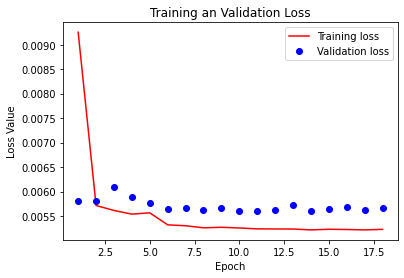

In [58]:
plt.figure()
plt.plot(range(1,len(train_loss)+1),train_loss,'r',label='Training loss')
plt.plot(range(1,len(test_loss)+1),test_loss,'bo',label = 'Validation loss')
plt.title('Training an Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [59]:
plt.figure(figsize=(8, 24))
imgs, _, _, _, _ = next(iter(test_dl))
imgs = imgs.to('cuda')
out1, out2, out3, out4 = model(imgs)
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.imshow(imgs[i].permute(1,2,0).cpu().numpy())
    xmin, ymin, xmax, ymax = (out1[i].item()*224, 
                              out2[i].item()*224, 
                              out3[i].item()*224, 
                              out4[i].item()*224)
    rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
    ax = plt.gca()
    ax.axes.add_patch(rect)

RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 6.00 GiB total capacity; 3.93 GiB already allocated; 19.13 MiB free; 4.02 GiB reserved in total by PyTorch)

<Figure size 576x1728 with 0 Axes>